In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Data collection
files=os.listdir('./Uberdata')
path='./Uberdata/'
final=pd.DataFrame()
files.remove('uber-raw-data-janjune-15.csv')

In [4]:

for file in files:
    fileloc=path+file
    print(fileloc)
    try:
        df=pd.read_csv(fileloc,encoding='utf-8')
    except:
        df=pd.read_csv(fileloc,encoding='cp1252')
    final=pd.concat([df,final])
final.shape    

./Uberdata/uber-raw-data-may14.csv
./Uberdata/uber-raw-data-jul14.csv
./Uberdata/uber-raw-data-aug14.csv
./Uberdata/uber-raw-data-sep14.csv
./Uberdata/uber-raw-data-apr14.csv
./Uberdata/uber-raw-data-jun14.csv


(4534327, 4)

In [5]:
# Data preparation
df=final.copy()
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S')


In [6]:
df['Weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['Minute']=df['Date/Time'].dt.minute
df['Hour']=df['Date/Time'].dt.hour
df['Month']=df['Date/Time'].dt.month

In [7]:
# Analysing trips of user
import plotly.express as px
px.bar(x=df['Weekday'].value_counts().index,y=df['Weekday'].value_counts())

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

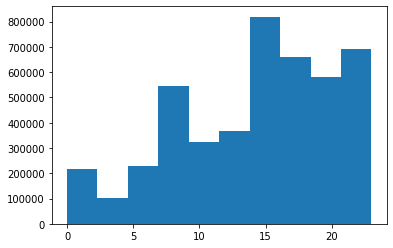

In [8]:
plt.hist(df['Hour'])

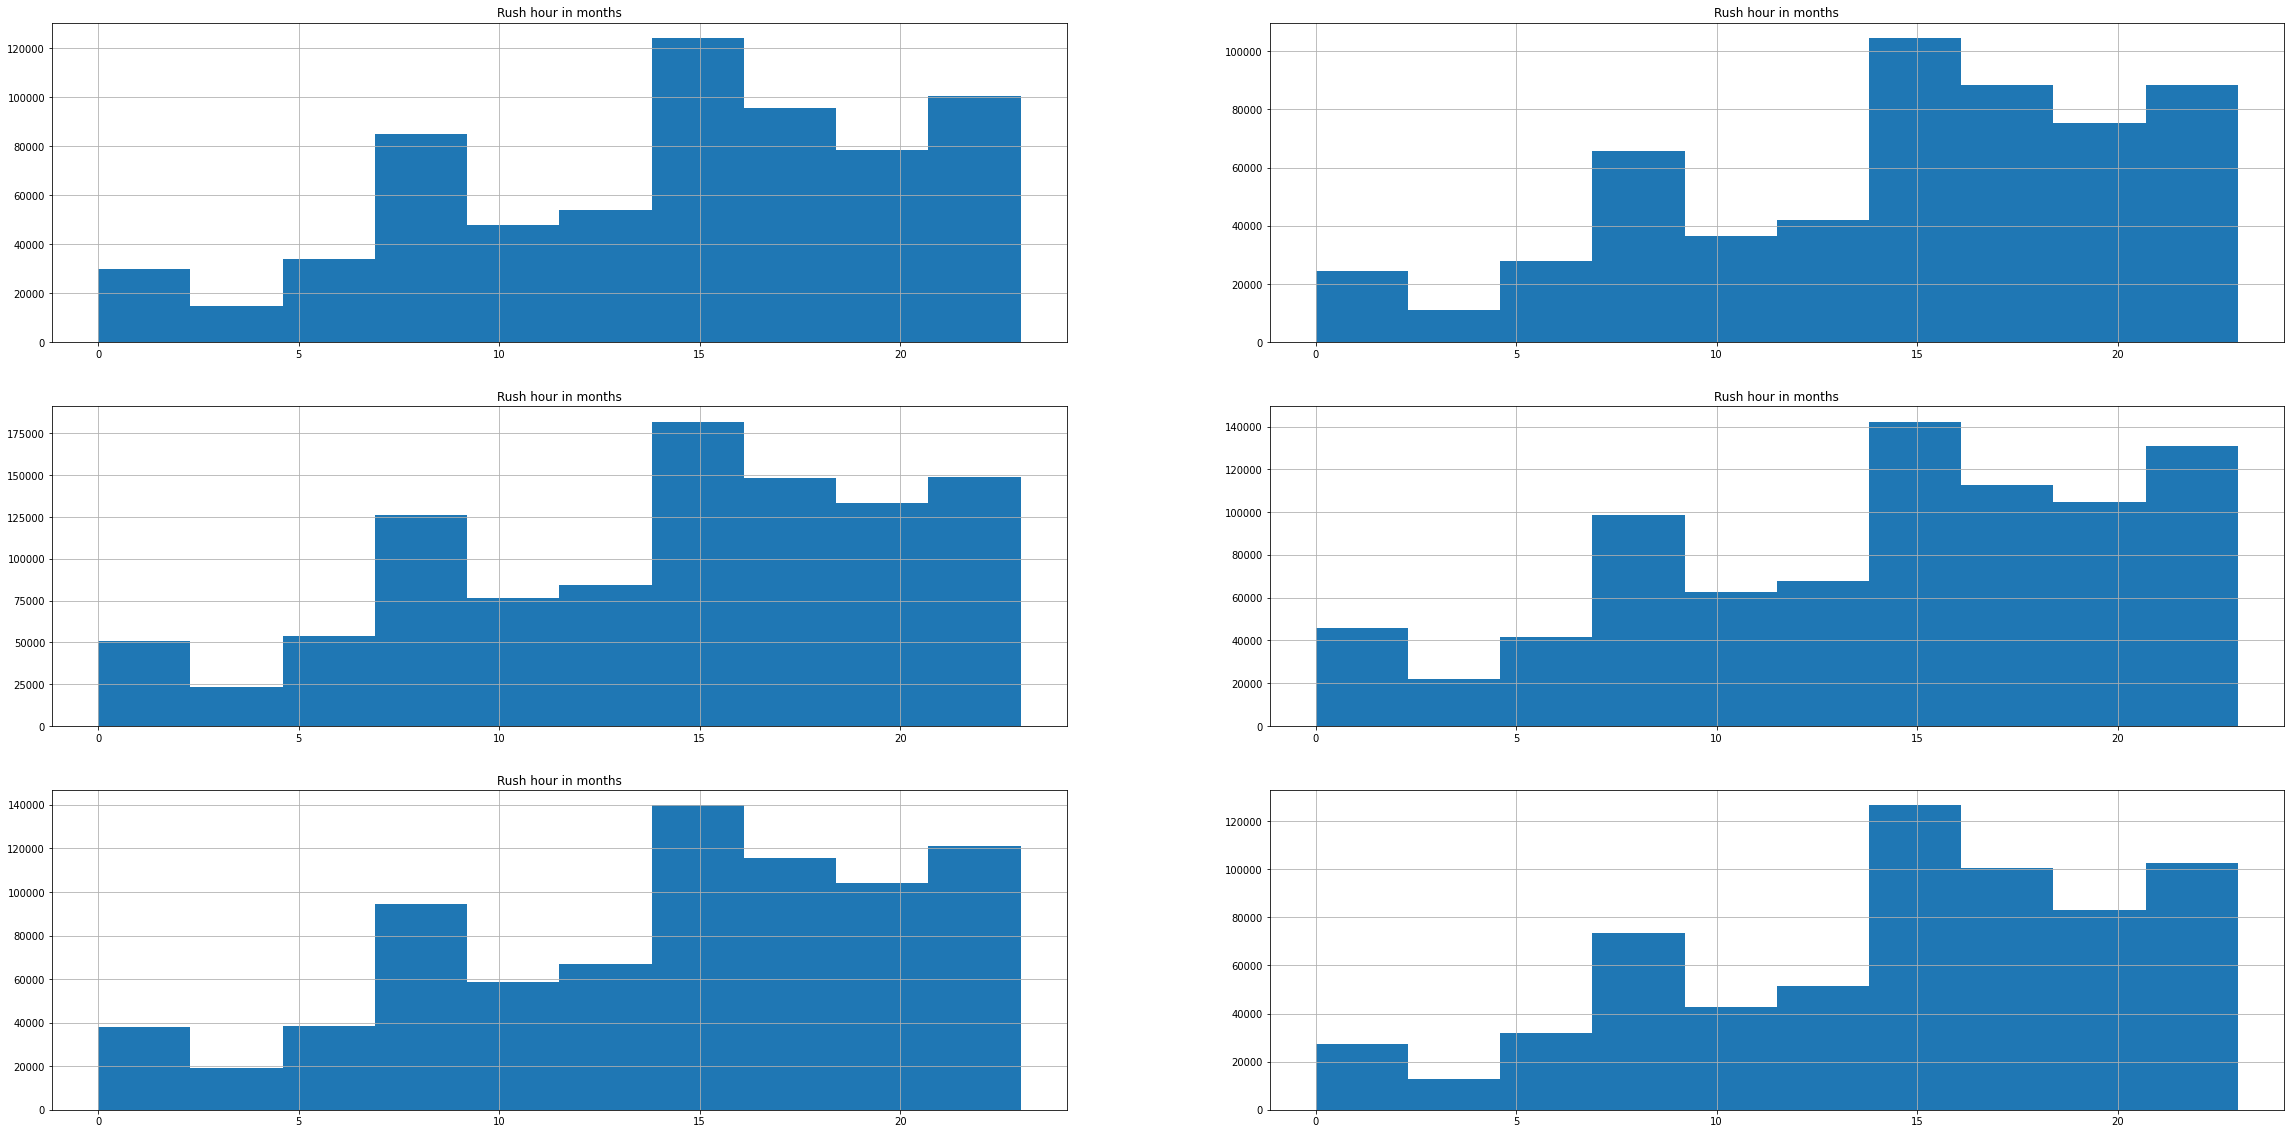

In [9]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df['Month'].unique()):
    plt.title("Rush hour in months")
    plt.subplot(3,2,i+1)
    df[df['Month']==month]['Hour'].hist()



In [10]:
# Analysing monthly trips
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [11]:
df.groupby('Month')['Hour'].count()

Month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: Hour, dtype: int64

In [12]:
trace1=go.Bar(x=df.groupby('Month')['Hour'].count().index,y=df.groupby('Month')['Hour'].count(),name='Priority')
iplot([trace1])

Text(0.5, 1.0, 'Journeys by Days')

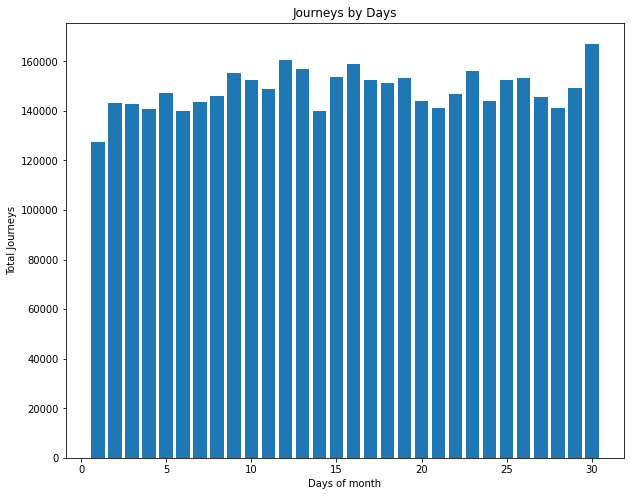

In [13]:
plt.figure(figsize=(10,8))
plt.hist(df['day'],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel("Days of month")
plt.ylabel("Total Journeys")
plt.title("Journeys by Days")

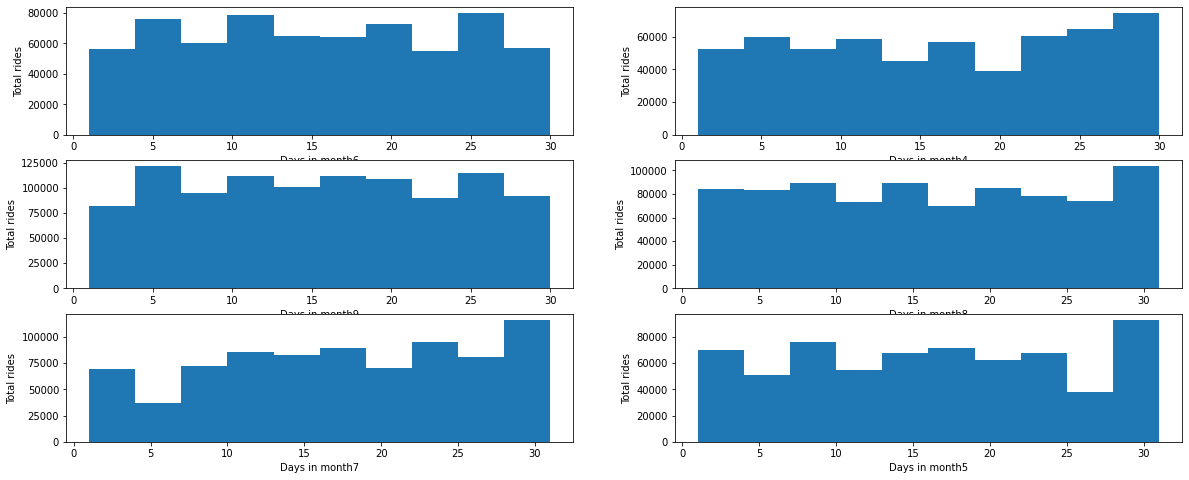

In [21]:
# Analysing demand of uber
plt.figure(figsize=(20,8))
for i,month in enumerate(df['Month'].unique(),1):
    plt.subplot(3,2,i)
    df_out=df[df['Month']==month]
    plt.hist(df_out['day'])
    plt.xlabel("Days in month{}".format(month))
    plt.ylabel("Total rides")

Text(0.5, 1.0, 'Hours Vs latitudes')

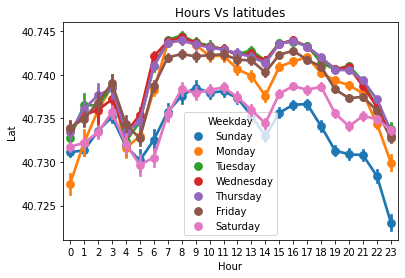

In [26]:
ax=sns.pointplot(x='Hour',y='Lat',data=df,hue="Weekday")
ax.set_title("Hours Vs latitudes")
